In [1]:
# Surfaces

In [1]:
import numpy as np
import pandas as pd
from volumetricspy import Surface
from volumetricspy.stats import Grid
import matplotlib.pyplot as plt
import seaborn as sns
import pyvista as pv

In [2]:
s1 = Surface(name='anticline')
s1.from_z_map('anticline',crs=3117)

In [3]:
_,_,z = s1.get_mesh()
print(z.shape)

(114, 160)


<a list of 7 text.Text objects>

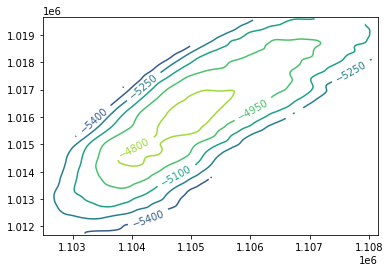

In [4]:
fig, ax = plt.subplots()
CS = s1.contour(ax=ax)
ax.clabel(CS, inline=True, fontsize=10)

              y             x            z  n
0  1.012878e+06  1.105535e+06 -5463.754044  0
1  1.012879e+06  1.105535e+06 -5463.754044  0
2  1.012948e+06  1.105600e+06 -5463.754044  1
3  1.012955e+06  1.105606e+06 -5463.754044  1
4  1.013018e+06  1.105666e+06 -5463.754044  2


<AxesSubplot:xlabel='x', ylabel='y'>

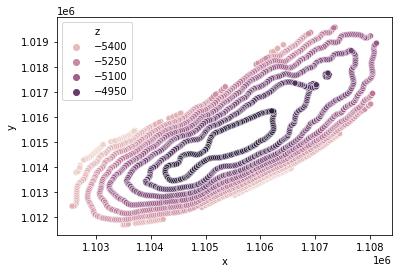

In [6]:
ct = s1.get_contours()
print(ct.head())
sns.scatterplot(data=ct, x='x', y='y', hue='z')

                 x             y            z      delta_x    delta_y  \
2352  1.103248e+06  1.015793e+06 -5558.169922 -1842.751472 -29.437870   
2321  1.103248e+06  1.015793e+06 -5558.169922 -1842.751472 -29.437870   
2322  1.103248e+06  1.015793e+06 -5558.169922 -1842.751480 -29.437879   
2317  1.103248e+06  1.015793e+06 -5558.169922 -1842.751480 -29.437879   
2318  1.103198e+06  1.015743e+06 -5558.169922 -1892.751471 -79.437870   

         angle  
2352 -3.125619  
2321 -3.125619  
2322 -3.125619  
2317 -3.125619  
2318 -3.099648  


<AxesSubplot:xlabel='x', ylabel='y'>

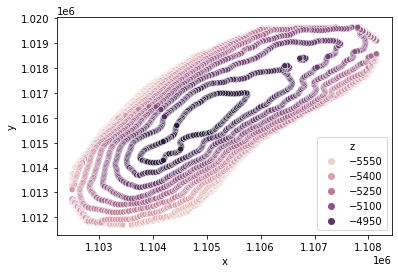

In [7]:
ct = s1.get_contours_bound()
print(ct.head())
sns.scatterplot(data=ct, x='x', y='y', hue='z')

In [8]:
s1.get_contours_area_bounds(levels=[-5000,-4950,-4900,-4850,-4801])

,area
-5000.0,2441.519715
-4950.0,1909.766003
-4900.0,1334.268946
-4850.0,868.904953
-4801.0,420.231630


In [9]:
s1.get_contours_area_mesh(levels=[-5000,-4950,-4900,-4850,-4800])

,area
-5000,2444.473366
-4950,1908.529218
-4900,1328.128873
-4850,866.895834
-4800,418.629185


In [10]:
s = s1.get_contours_gdf(levels=[-5000,-4950,-4900,-4850,-4800]).reset_index()
s

,index,level,geometry
0,0,-5000,"MULTIPOLYGON (((1107654.045 1018744.253, 11076..."
1,1,-4950,"MULTIPOLYGON (((1107477.483 1018220.101, 11074..."
2,2,-4900,"MULTIPOLYGON (((1107053.733 1017369.147, 11070..."
3,3,-4850,"MULTIPOLYGON (((1106559.358 1017211.366, 11065..."
4,4,-4800,"MULTIPOLYGON (((1106206.233 1016200.122, 11061..."


In [11]:
s1.surface_map(fill_color='YlGn')

In [12]:
s1.get_z(1105670.350, 1016942.618)

array(-4796.27118937)

In [13]:
struct = s1.structured_surface_vtk()
struct.save('surf.vtk')

In [14]:
grid = s1.make_grid(dz=-50,nz=15 )


In [15]:
grid_vtk = grid.unstructured_grid_vtk()
grid_vtk.plot(show_edges=True)

/Users/scuervo91/Documents/dev/volumetricspy/volumetricspy/stats/grid.py:921: UserWarning: VTK 9 no longer accepts an offset array
  grid = pv.UnstructuredGrid(offset, cells, cell_type, points)


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [16]:
grid_vtk.save('vers5.vtk')

In [ ]:
xx,yy,zz = s1.get_mesh()
xx_f = xx.flatten(order='C')
yy_f = yy.flatten(order='C')
zz_f = zz.flatten(order='C')

xx_fn = xx_f[~np.isnan(zz_f)]
yy_fn = yy_f[~np.isnan(zz_f)]
zz_fn = zz_f[~np.isnan(zz_f)]

coords = pd.DataFrame({'x1':xx_f,'y1':yy_f,'z1':zz_f})
coords[['x2','y2']] = coords[['x1','y1']]
coords['z2'] = coords['z1'] - 250
coords.shape
coords_f = coords.values.flatten(order='C')

In [ ]:
xx

In [ ]:
coords.head().values.flatten(order='C')

In [ ]:
_,_, zz = s1.get_mesh()
zz = zz.reshape(*zz.shape,1)
dz = np.arange(-50,-300,-50).reshape(1,1,-1)
zz = dz + zz
print(dz)
zz = zz.repeat(2, axis=0)[1:-1,:,:]
zz = zz.repeat(2, axis=1)[:,1:-1,:]
zz = zz.repeat(2, axis=2)[:,:,1:-1]

zz.shape
zcorn = zz.flatten(order='C')

In [ ]:
grid = Grid(
    nx = 159,
    ny = 113,
    nz = 4,
    coord=coords_f.tolist(), 
    zcorn=zcorn.tolist(), 
    grid_type='corner_point'
)


In [ ]:
g = grid.get_vtk()
g

In [ ]:
g.plot()

In [ ]:
_,_, zz = s1.get_mesh()
zz = zz.reshape(*zz.shape,1)
dz = np.arange(-50,-300,-50).reshape(1,1,-1)
zz = dz + zz


xx, yy , _ = np.meshgrid(s1.x,s1.y,np.zeros(5))
print(xx.shape, yy.shape, zz.shape)
xx = xx.repeat(2, axis=0)[1:-1,:,:]
xx = xx.repeat(2, axis=1)[:,1:-1,:]
xx = xx.repeat(2, axis=2)[:,:,1:-1]

yy = yy.repeat(2, axis=0)[1:-1,:,:]
yy = yy.repeat(2, axis=1)[:,1:-1,:]
yy = yy.repeat(2, axis=2)[:,:,1:-1]

zz = zz.repeat(2, axis=0)[1:-1,:,:]
zz = zz.repeat(2, axis=1)[:,1:-1,:]
zz = zz.repeat(2, axis=2)[:,:,1:-1]
print(xx.shape, yy.shape, zz.shape)
dims = np.array([160, 114, 5])
print(dims)

xx_f = xx.flatten(order='F')
yy_f = yy.flatten(order='F')
zz_f = zz.flatten(order='F')
print(xx_f.shape, yy_f.shape, zz_f.shape)
xx_fn = xx_f[~np.isnan(zz_f)]
yy_fn = yy_f[~np.isnan(zz_f)]
zz_fn = zz_f[~np.isnan(zz_f)]


In [ ]:
df = pd.DataFrame({'x':xx_fn,'y':yy_fn,'z':zz_fn})
df['x'].nunique()
df['y'].nunique()



In [ ]:
yy_fn.shape

In [ ]:
corners = np.stack([xx_fn,yy_fn,zz_fn], axis=1)
print(corners.shape)
grid = pv.ExplicitStructuredGrid([160,114,5], corners)
#_ = grid.compute_connectivity()
#grid.plot(show_edges=True)  

In [ ]:
grid.save('vers3.vtk')

In [ ]:
grid